<a href="https://www.kaggle.com/code/gebrielgidey/embeddings-visuaiizer?scriptVersionId=189347231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import torch
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from collections import defaultdict
from gensim.models import KeyedVectors

from transformers import BertModel, BertTokenizer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
w2v_file = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_name = os.path.join(dirname, filename)
        if file_name.endswith('.bin') or ('.gz'):
            w2v_file = file_name
        else:
            print(f'Found unexpected file: {file_name}')
                
print(f'Google news word to vec file: {w2v_file}') #<< faster than doing api.load

# Load Word2Vec model
w2v = KeyedVectors.load_word2vec_format (w2v_file, binary=True)

print(f'{w2v} can map words onto vectors with 300 dimensions')

vector_dim = 300

# Checks if a CUDA enabled GPU is available and prints out its information
if torch.cuda.is_available():
    print("CUDA is available!")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        
    device = torch.device("cuda:0")

else:
    print("CUDA is not available.")
    device = torch.device("cpu")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Google news word to vec file: /kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
KeyedVectors<vector_size=300, 3000000 keys> can map words onto vectors with 300 dimensions
CUDA is not available.


In [2]:
def load_w2v_model(file_path):
    """Loads the Word2Vec model from the specified file path."""
    return KeyedVectors.load_word2vec_format(file_path, binary=True)

In [3]:
def get_random_embeddings(words):
    """Generates random embeddings for the given words."""
    random_vectors = defaultdict(lambda: np.random.rand(vector_dim))
    for token in words:
        random_vectors[token] 
    return np.array(list(random_vectors.values())), list(random_vectors.keys())

In [4]:
def get_w2v_embeddings(words, w2v_model):
    """Retrieves Word2Vec embeddings for the given words."""
    w2v_vectors = defaultdict(lambda: np.zeros(vector_dim))
    for token in words:
        if token in w2v_model.key_to_index:
            w2v_vectors[token] = w2v_model[token]
    return np.array(list(w2v_vectors.values())), list(w2v_vectors.keys())

In [5]:
def get_attention_embeddings(words):
    """Generates attention embeddings using a pre-trained BERT model."""
    model = BertModel.from_pretrained('bert-base-uncased')
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    input_ids = tokenizer.encode(words, add_special_tokens=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids)
        attention_embeddings = outputs.last_hidden_state
    return attention_embeddings.squeeze(0).numpy()

In [6]:
def visualize_embeddings(vectors, words, title, method='tsne'):
    """Visualizes embeddings using t-SNE or PCA dimensionality reduction."""
    perplexity = min(len(words) - 1, 30)
    if method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        title = f't-SNE Visualization ({title})'
    else:
        reducer = PCA(n_components=2)
        title = f'PCA Visualization ({title})'
    reduced_vectors = reducer.fit_transform(vectors)
    plt.figure(figsize=(18, 16))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=16)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.tight_layout()
    plt.show()

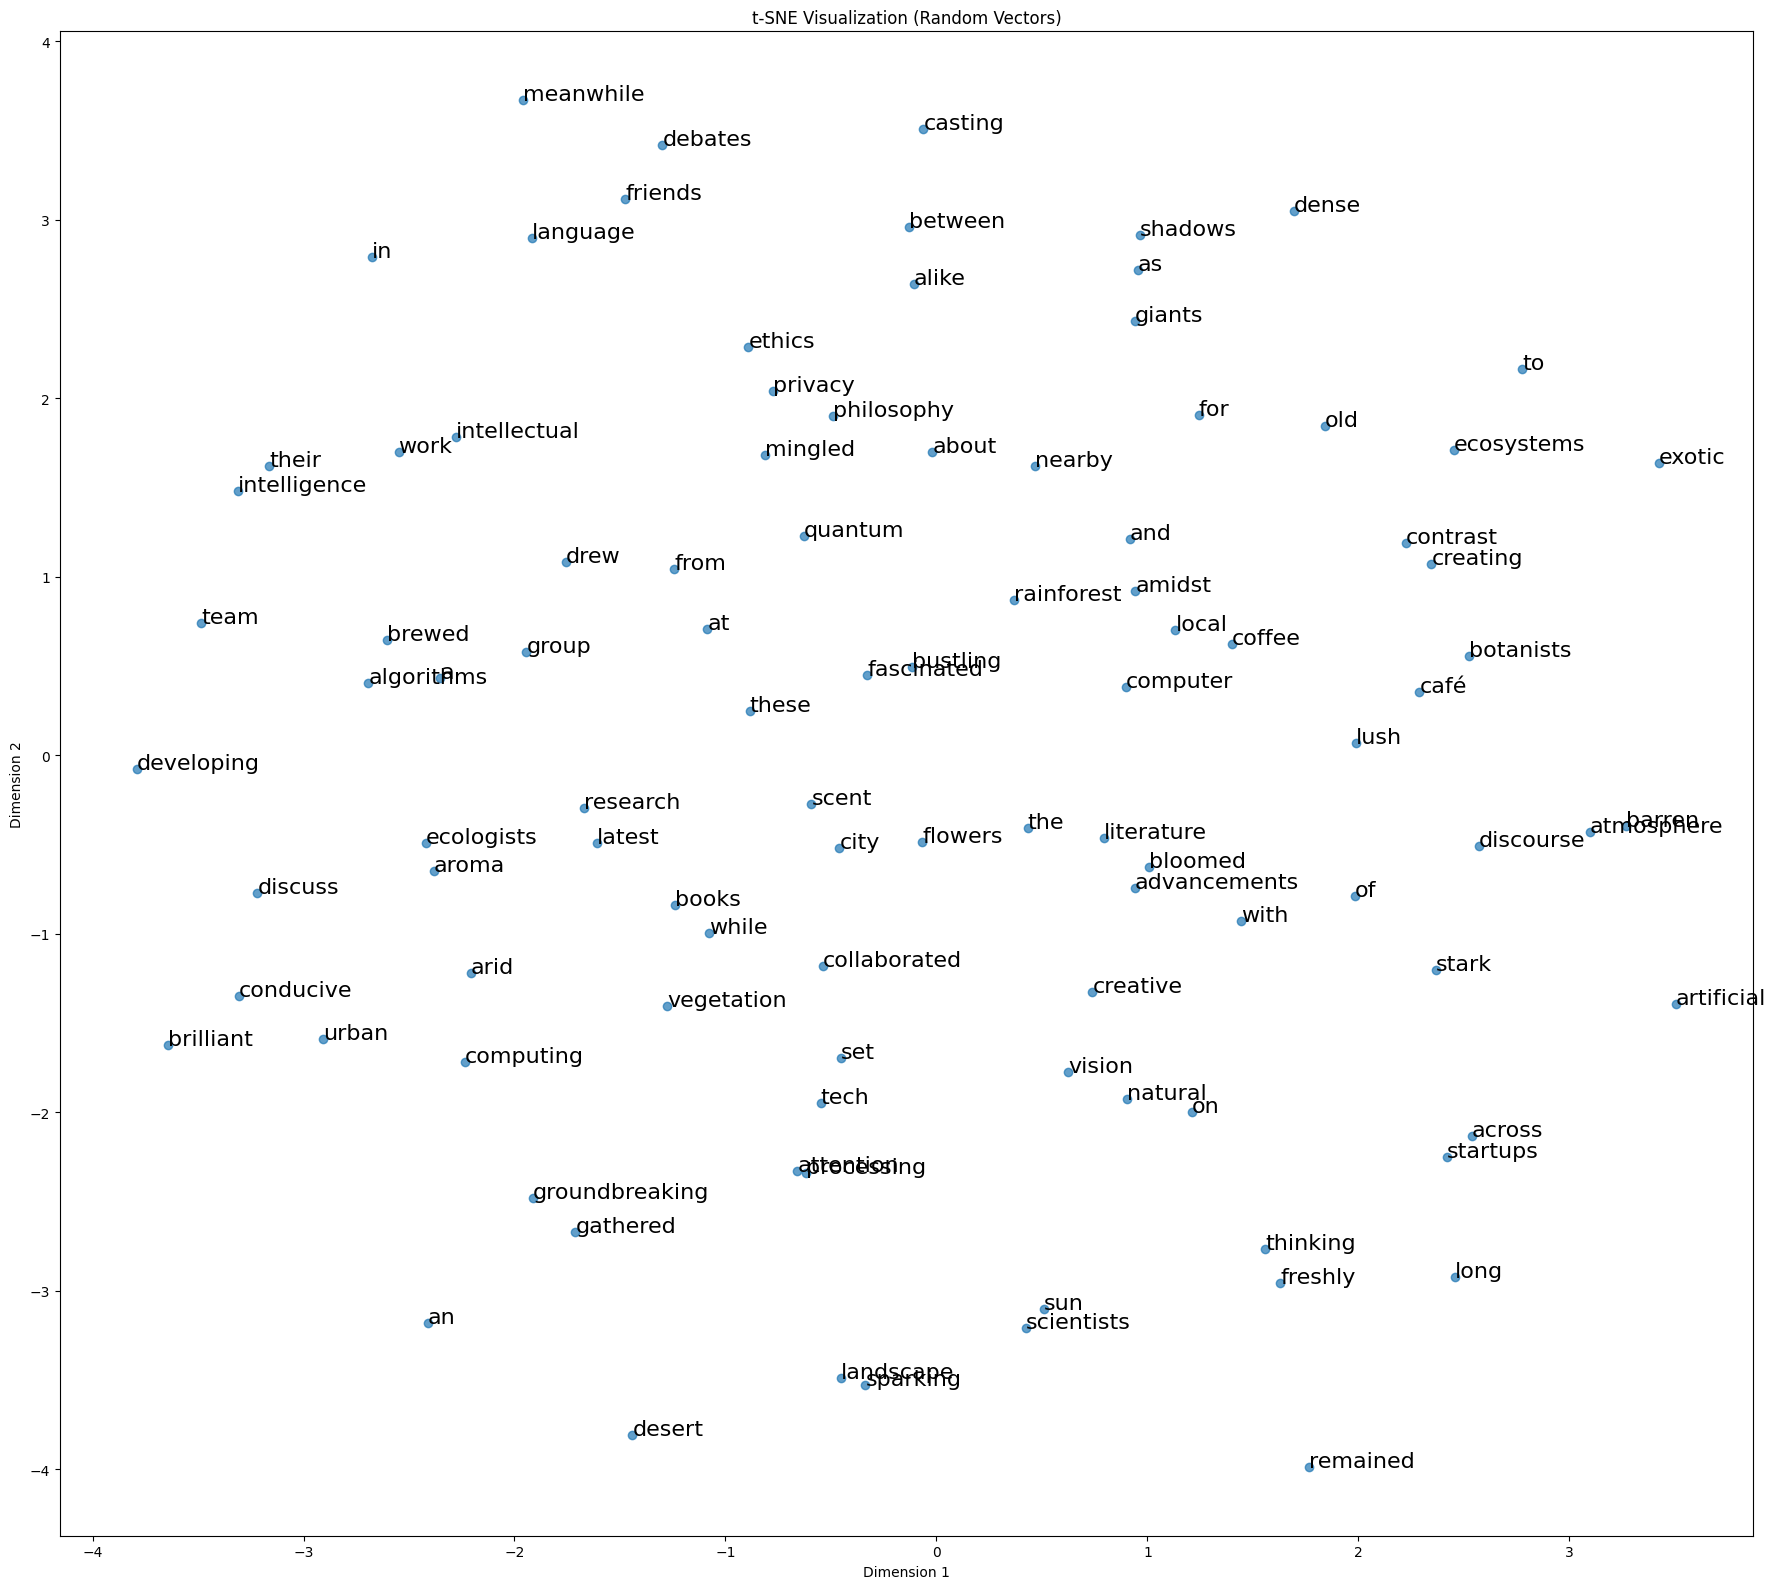

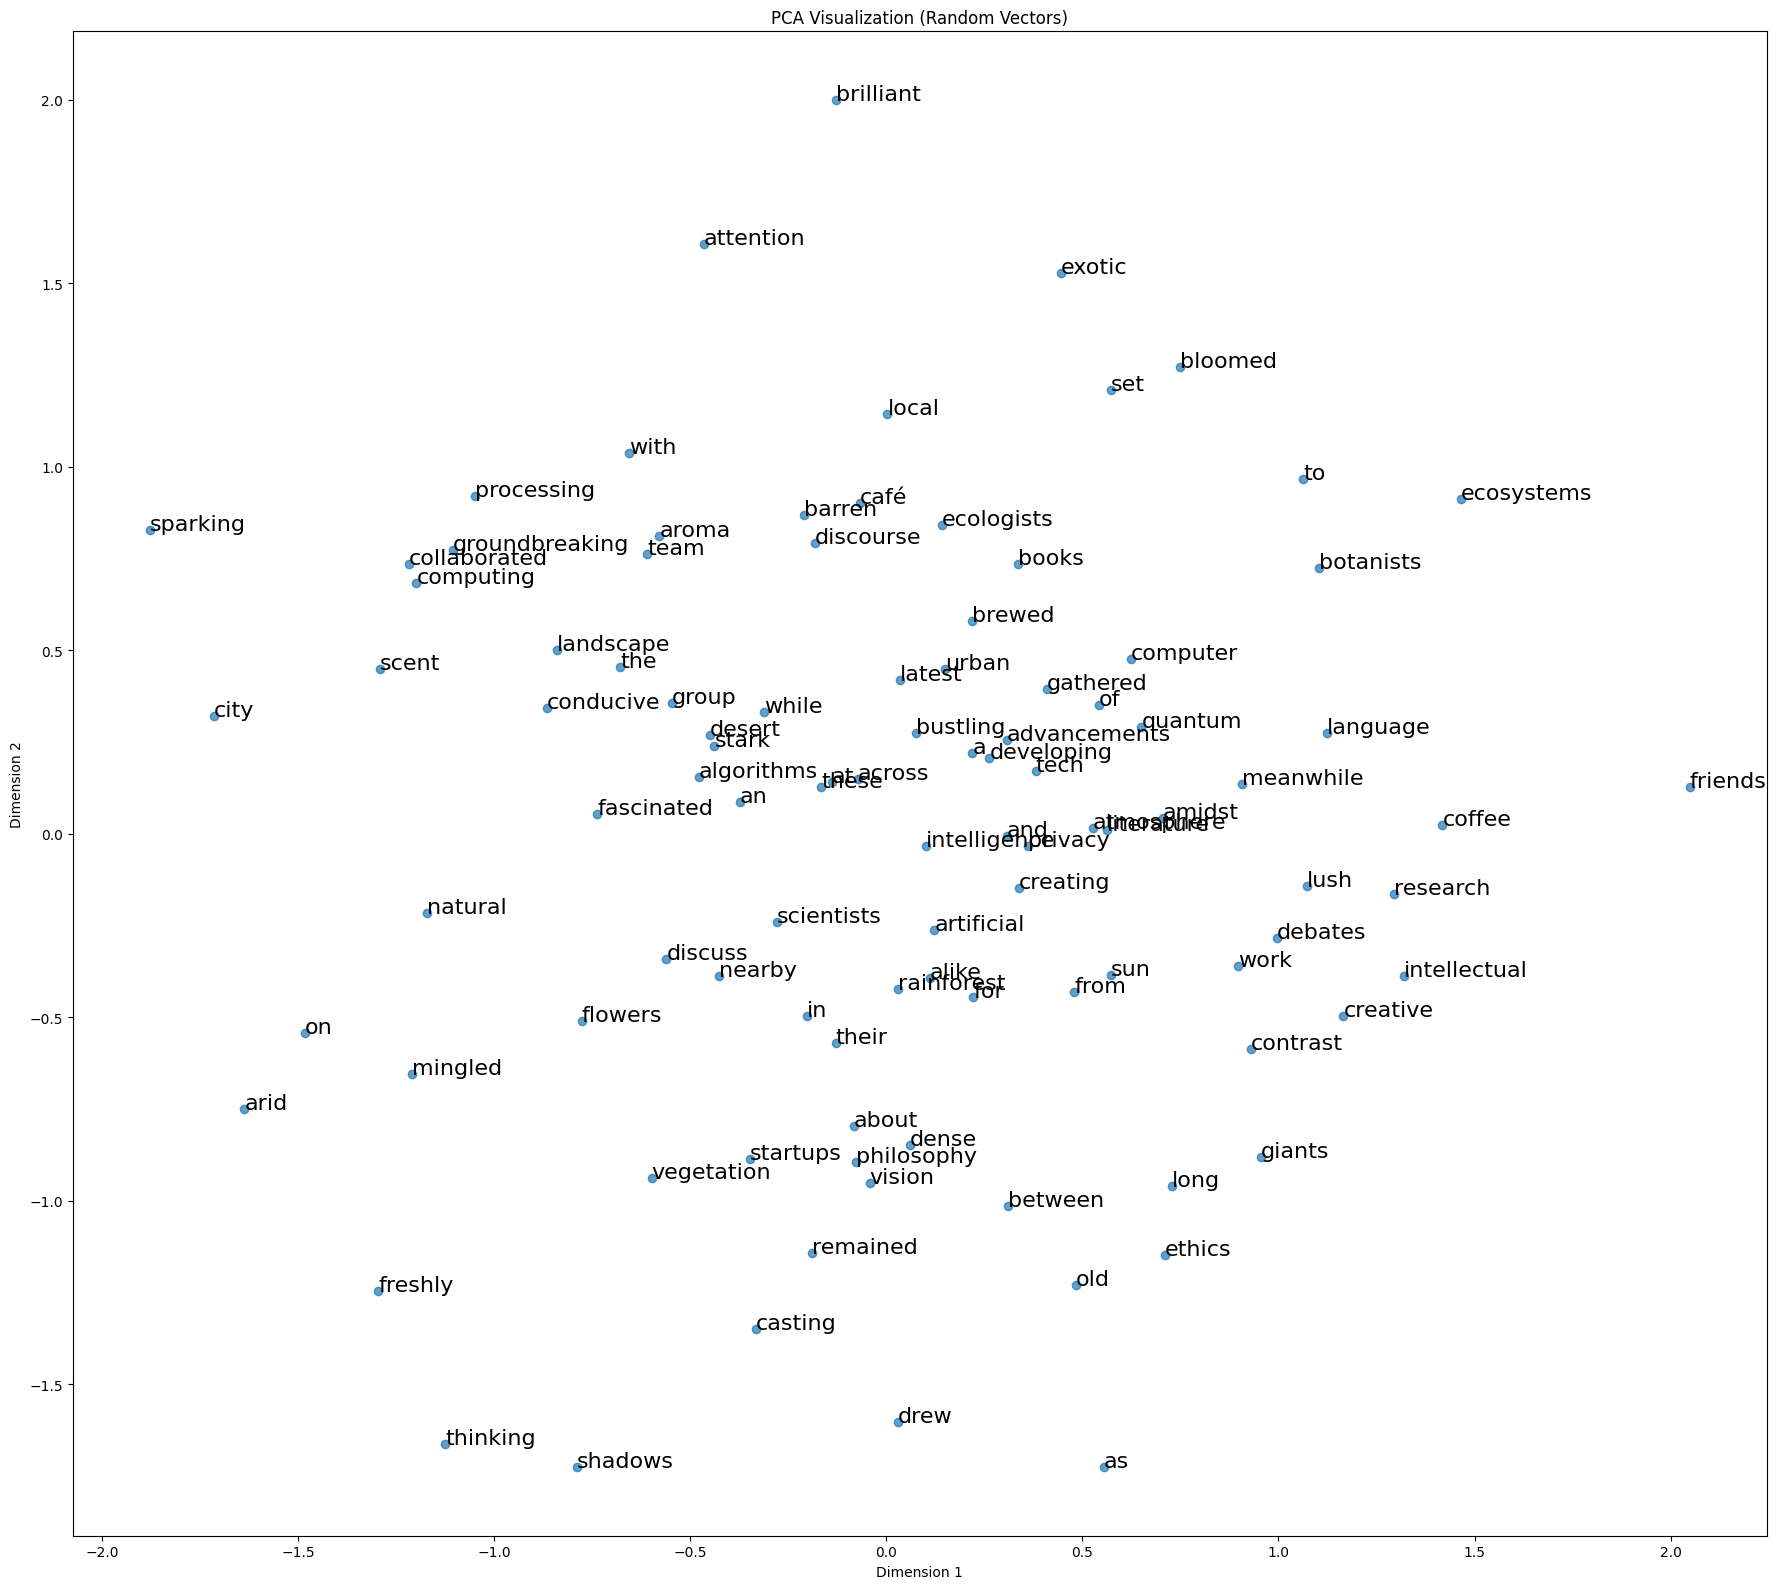

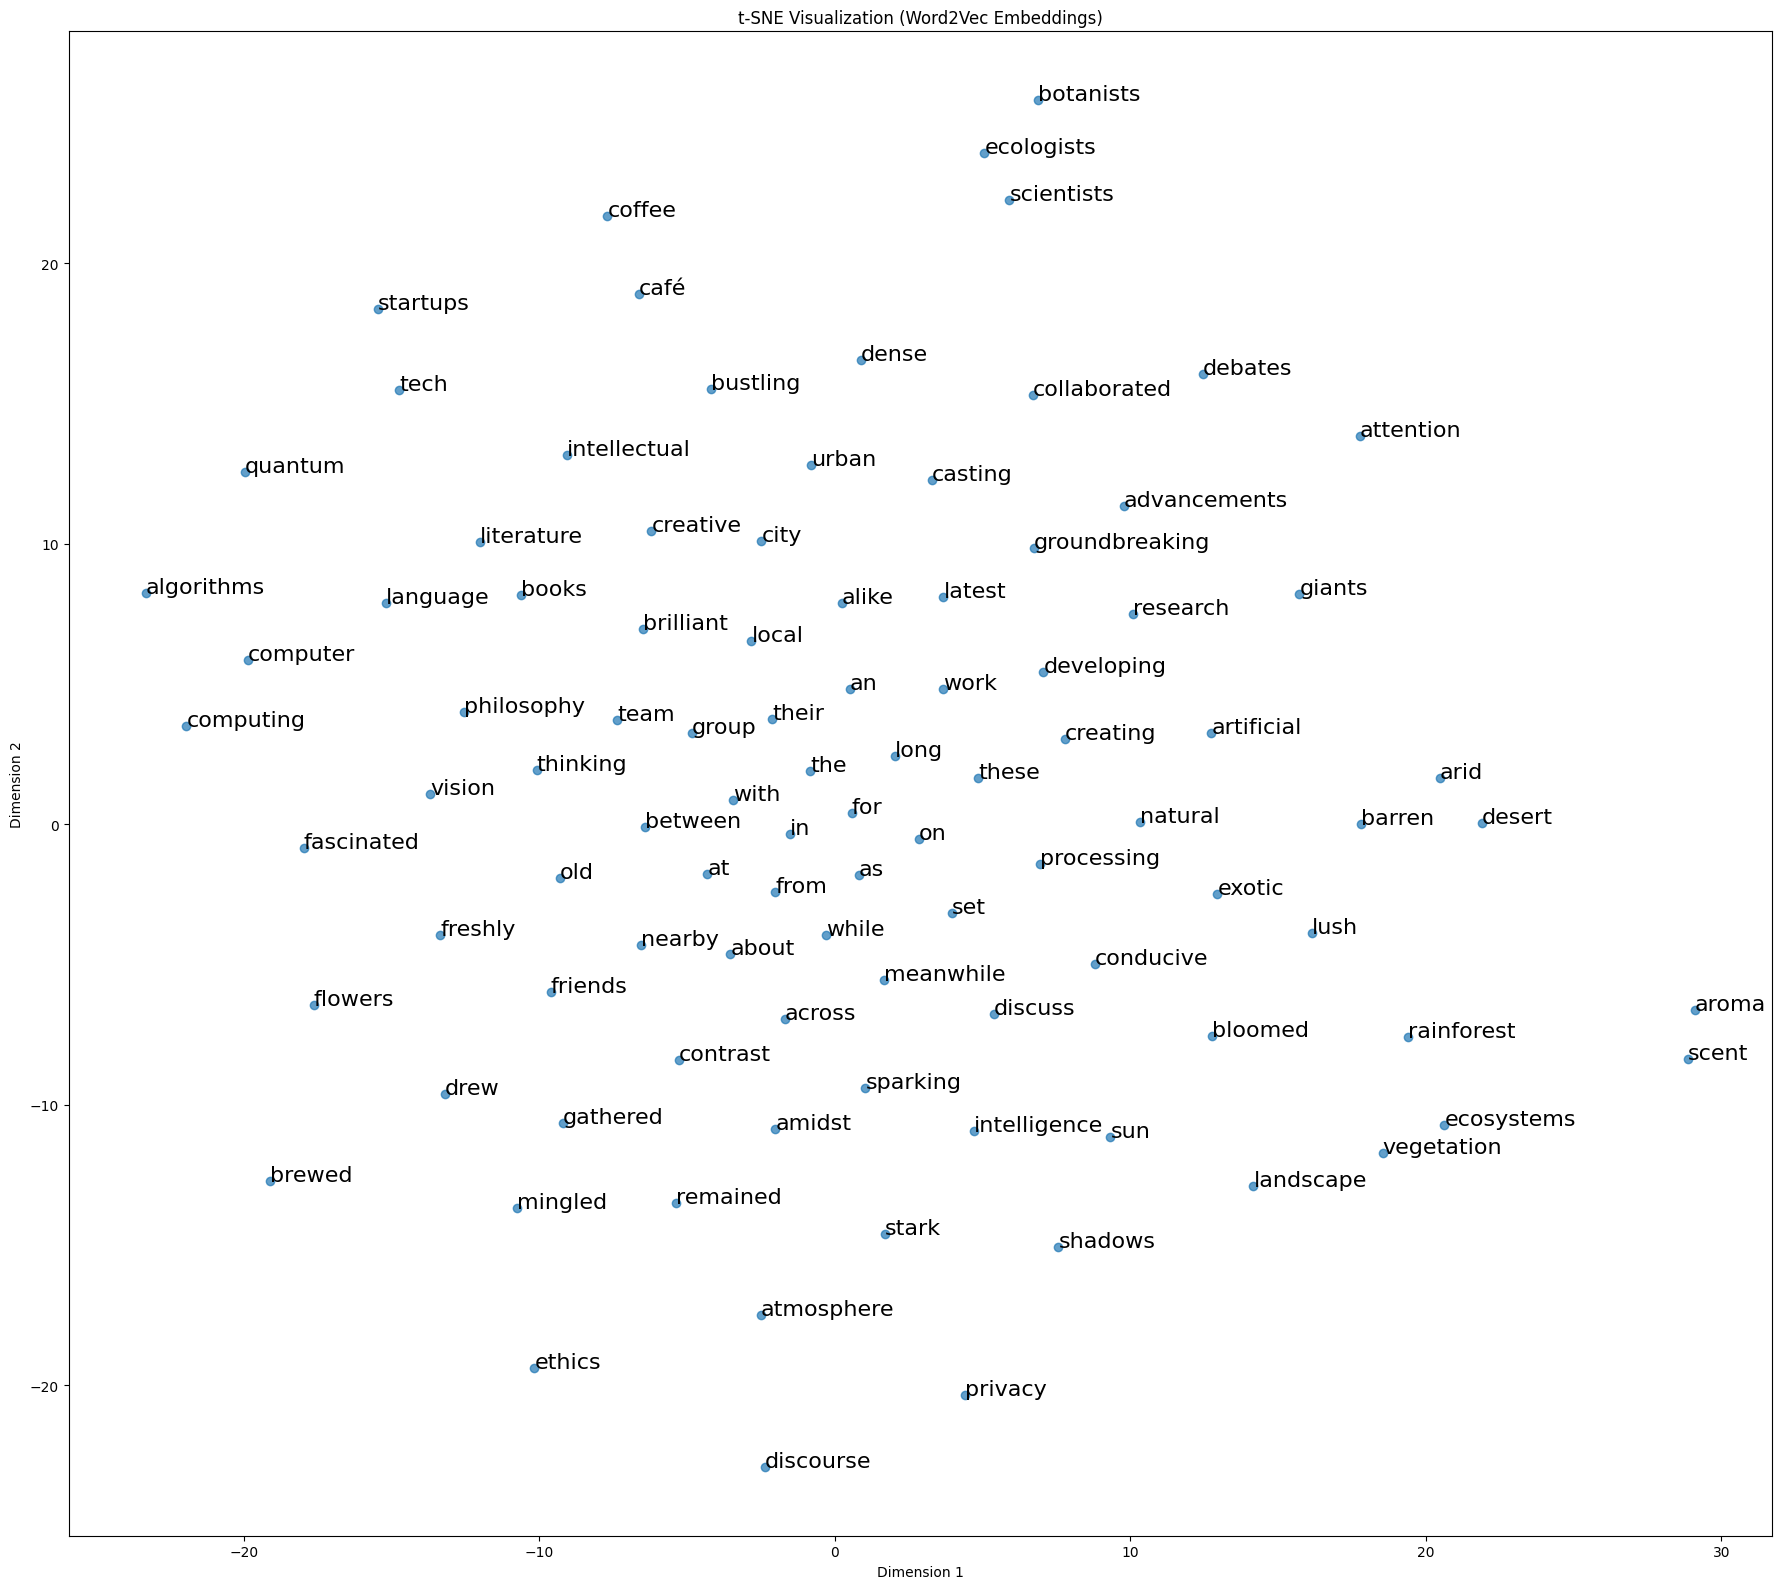

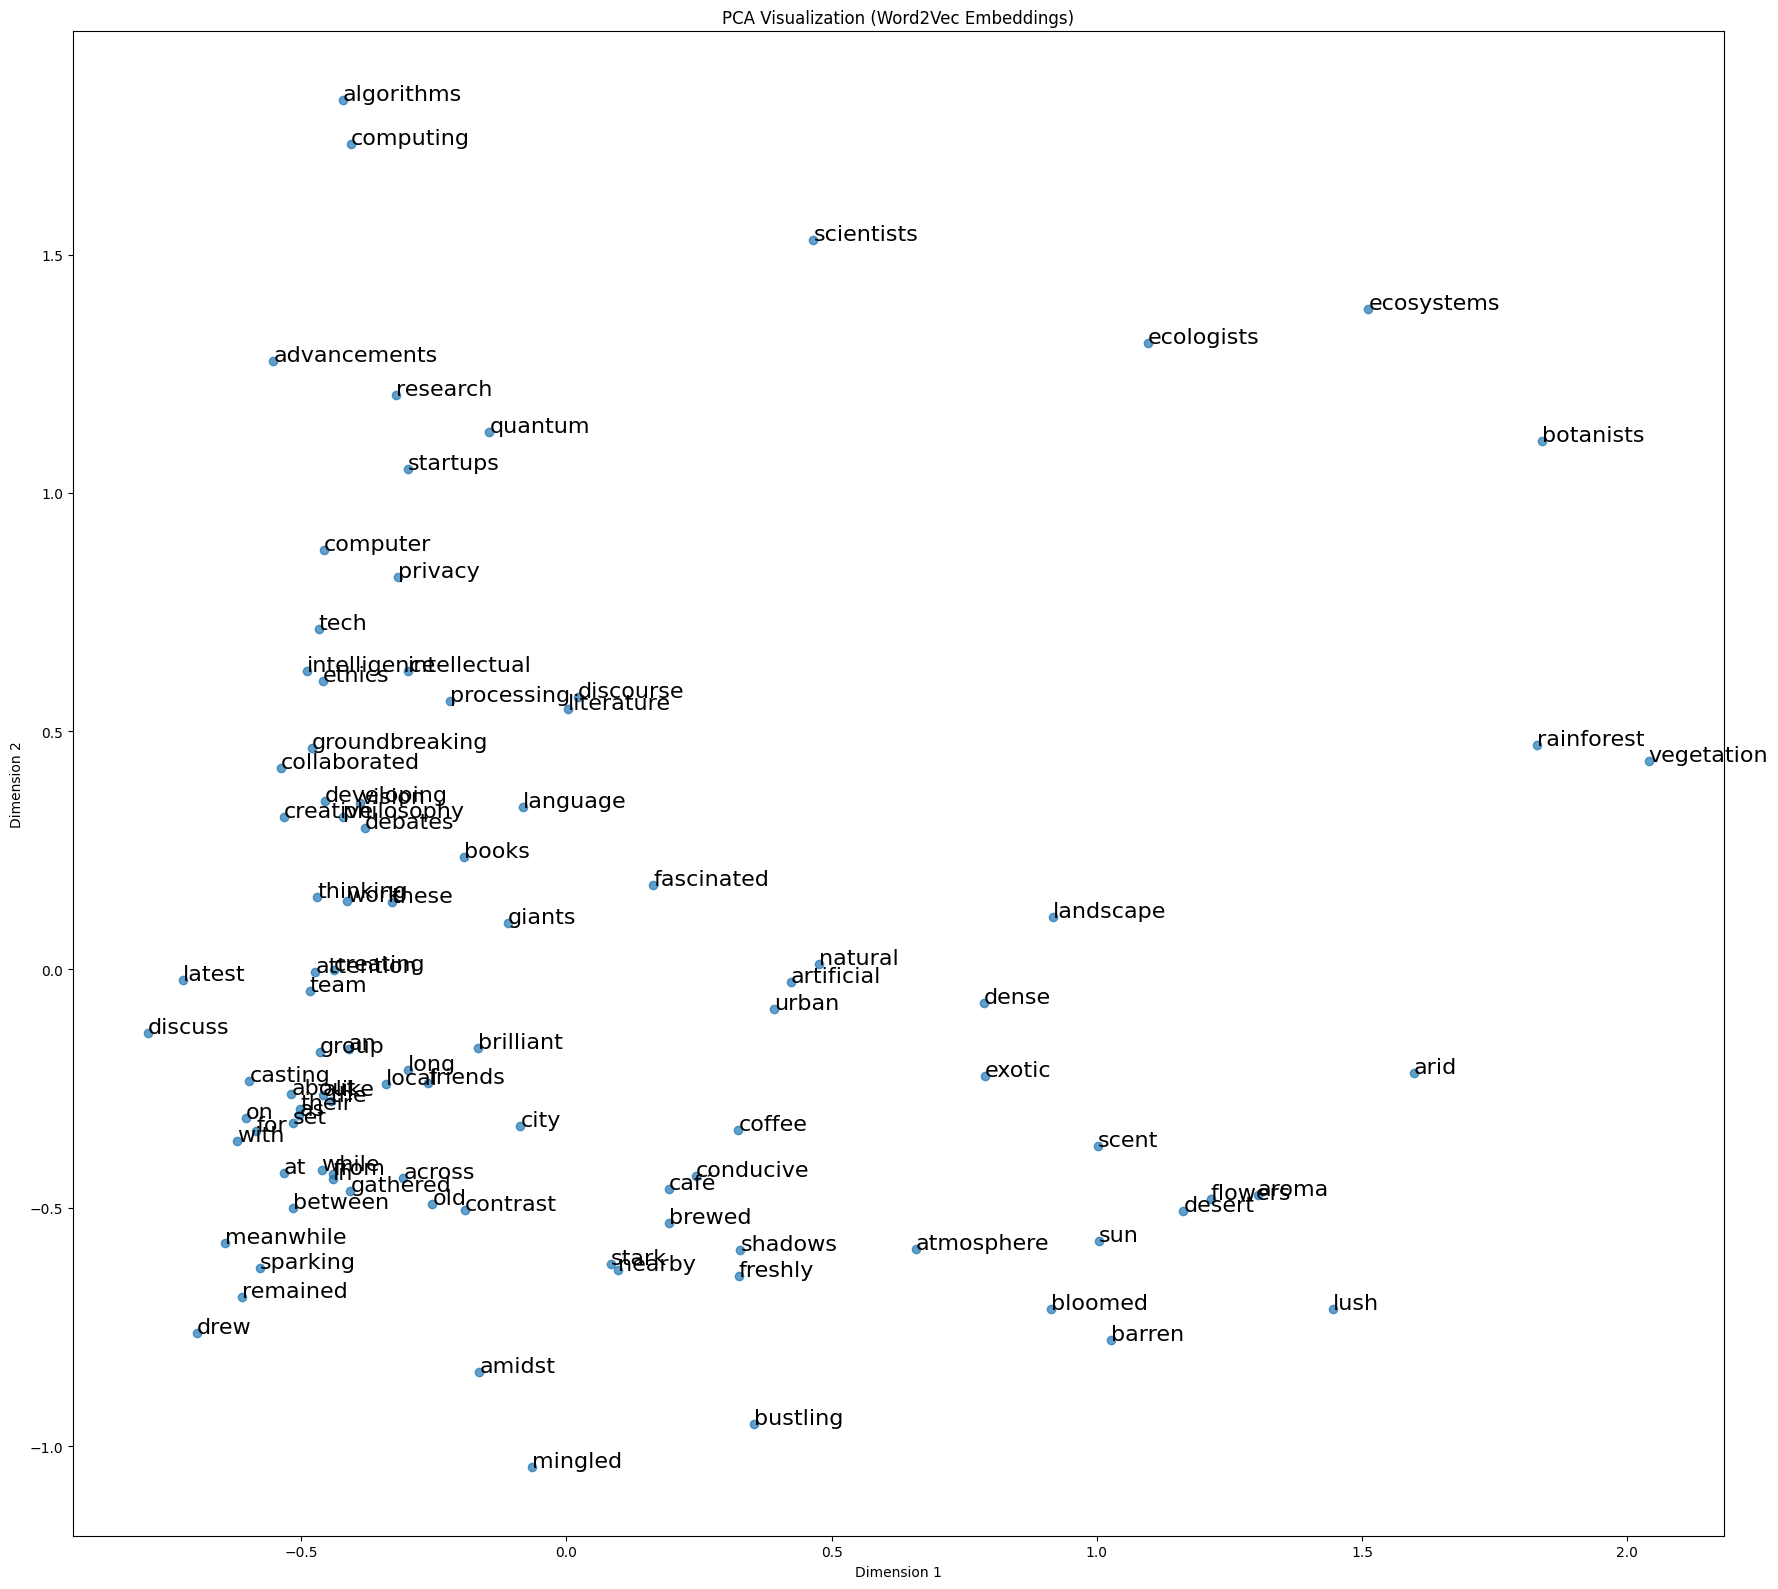

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

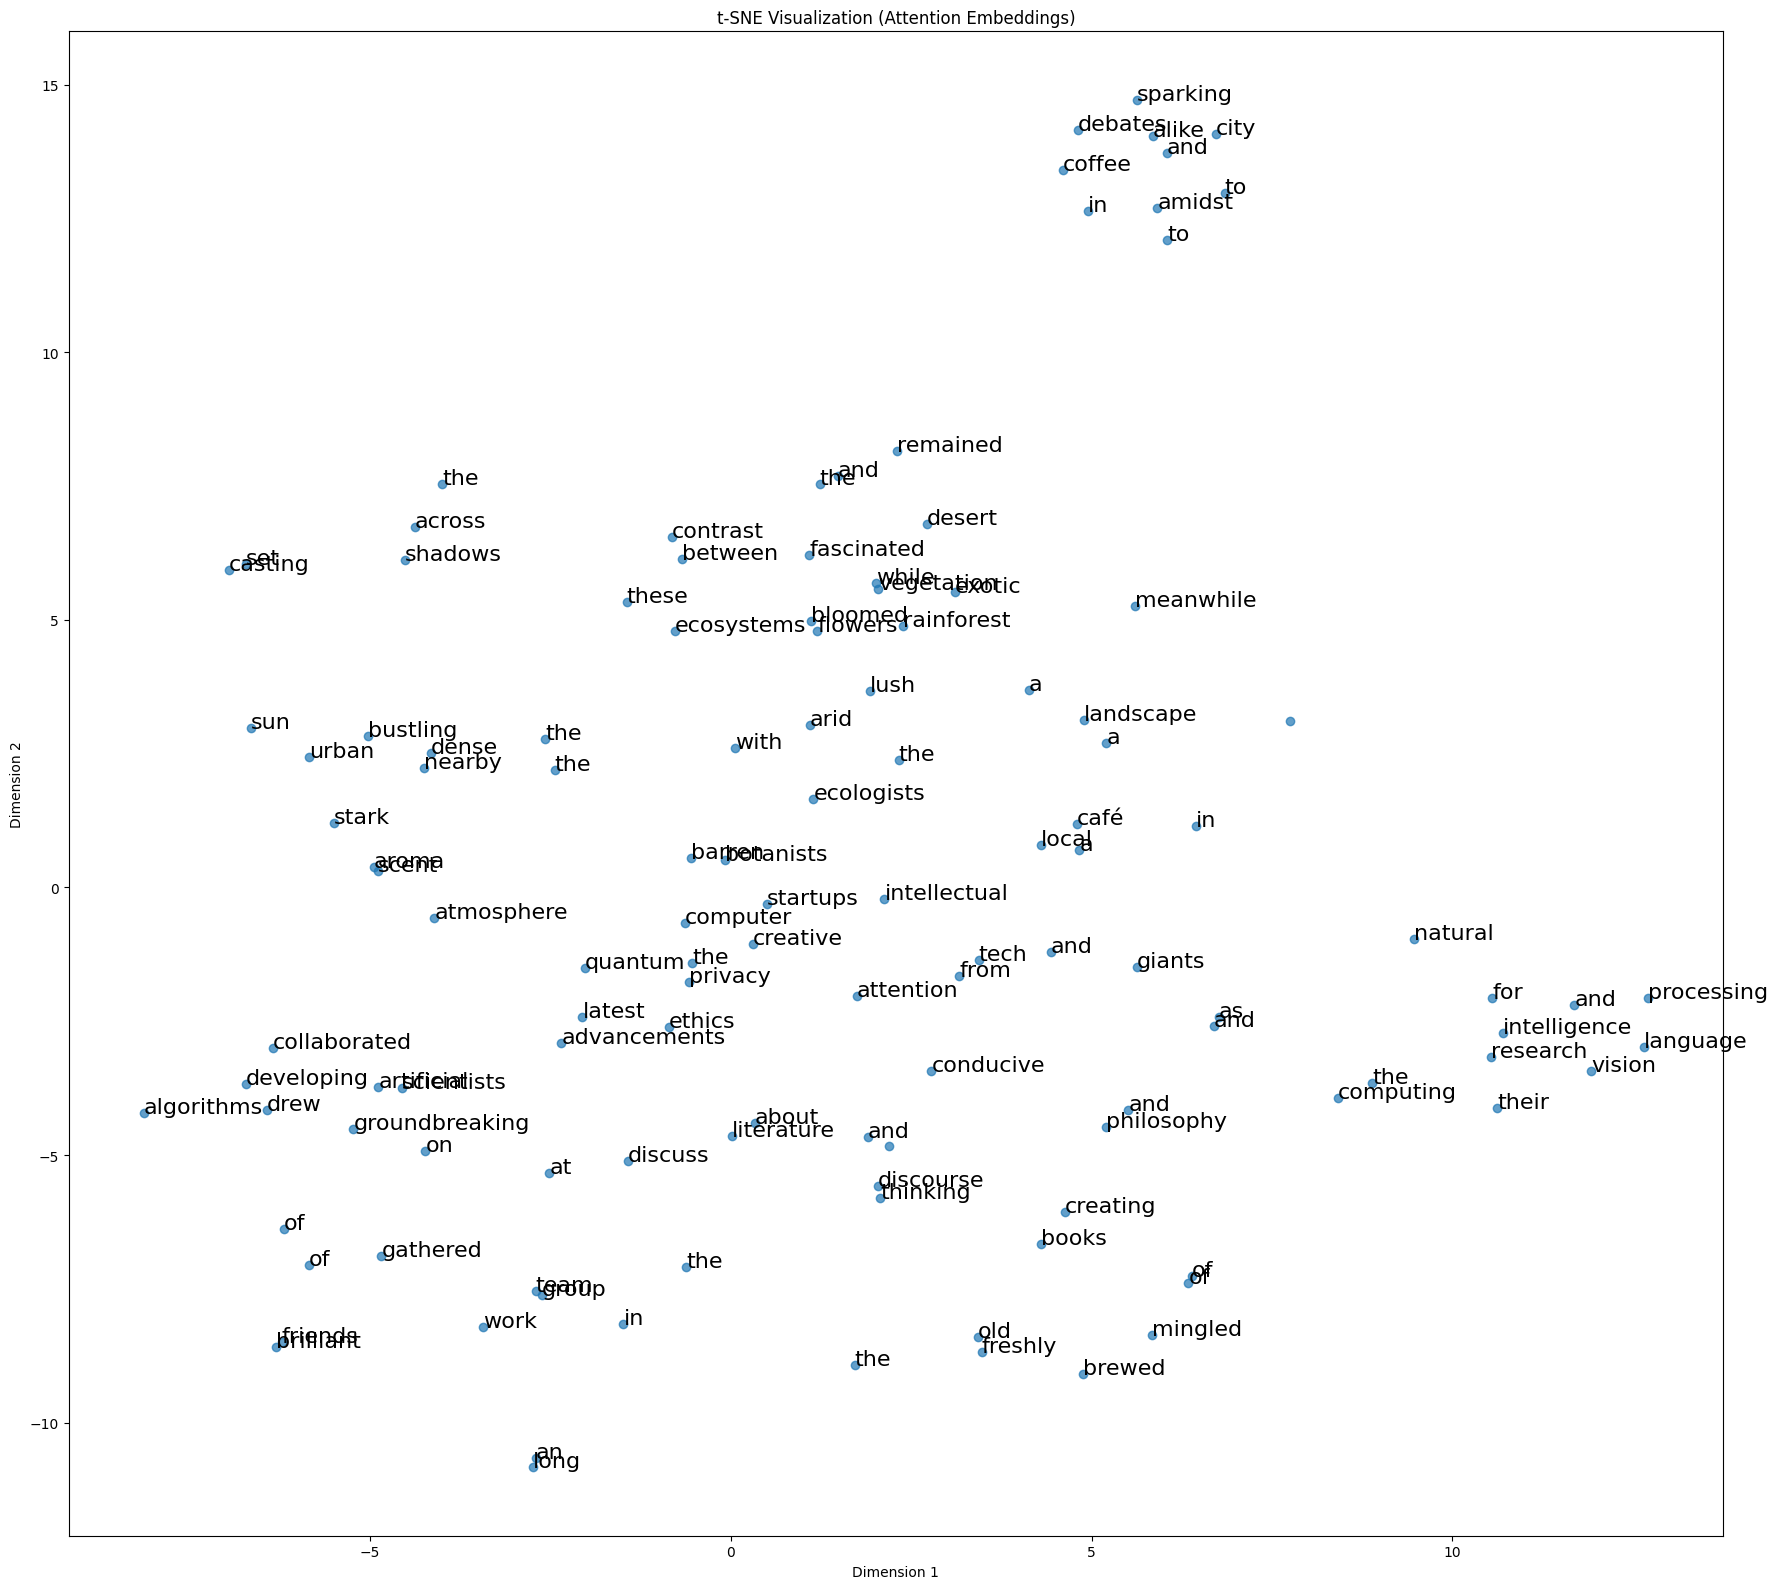

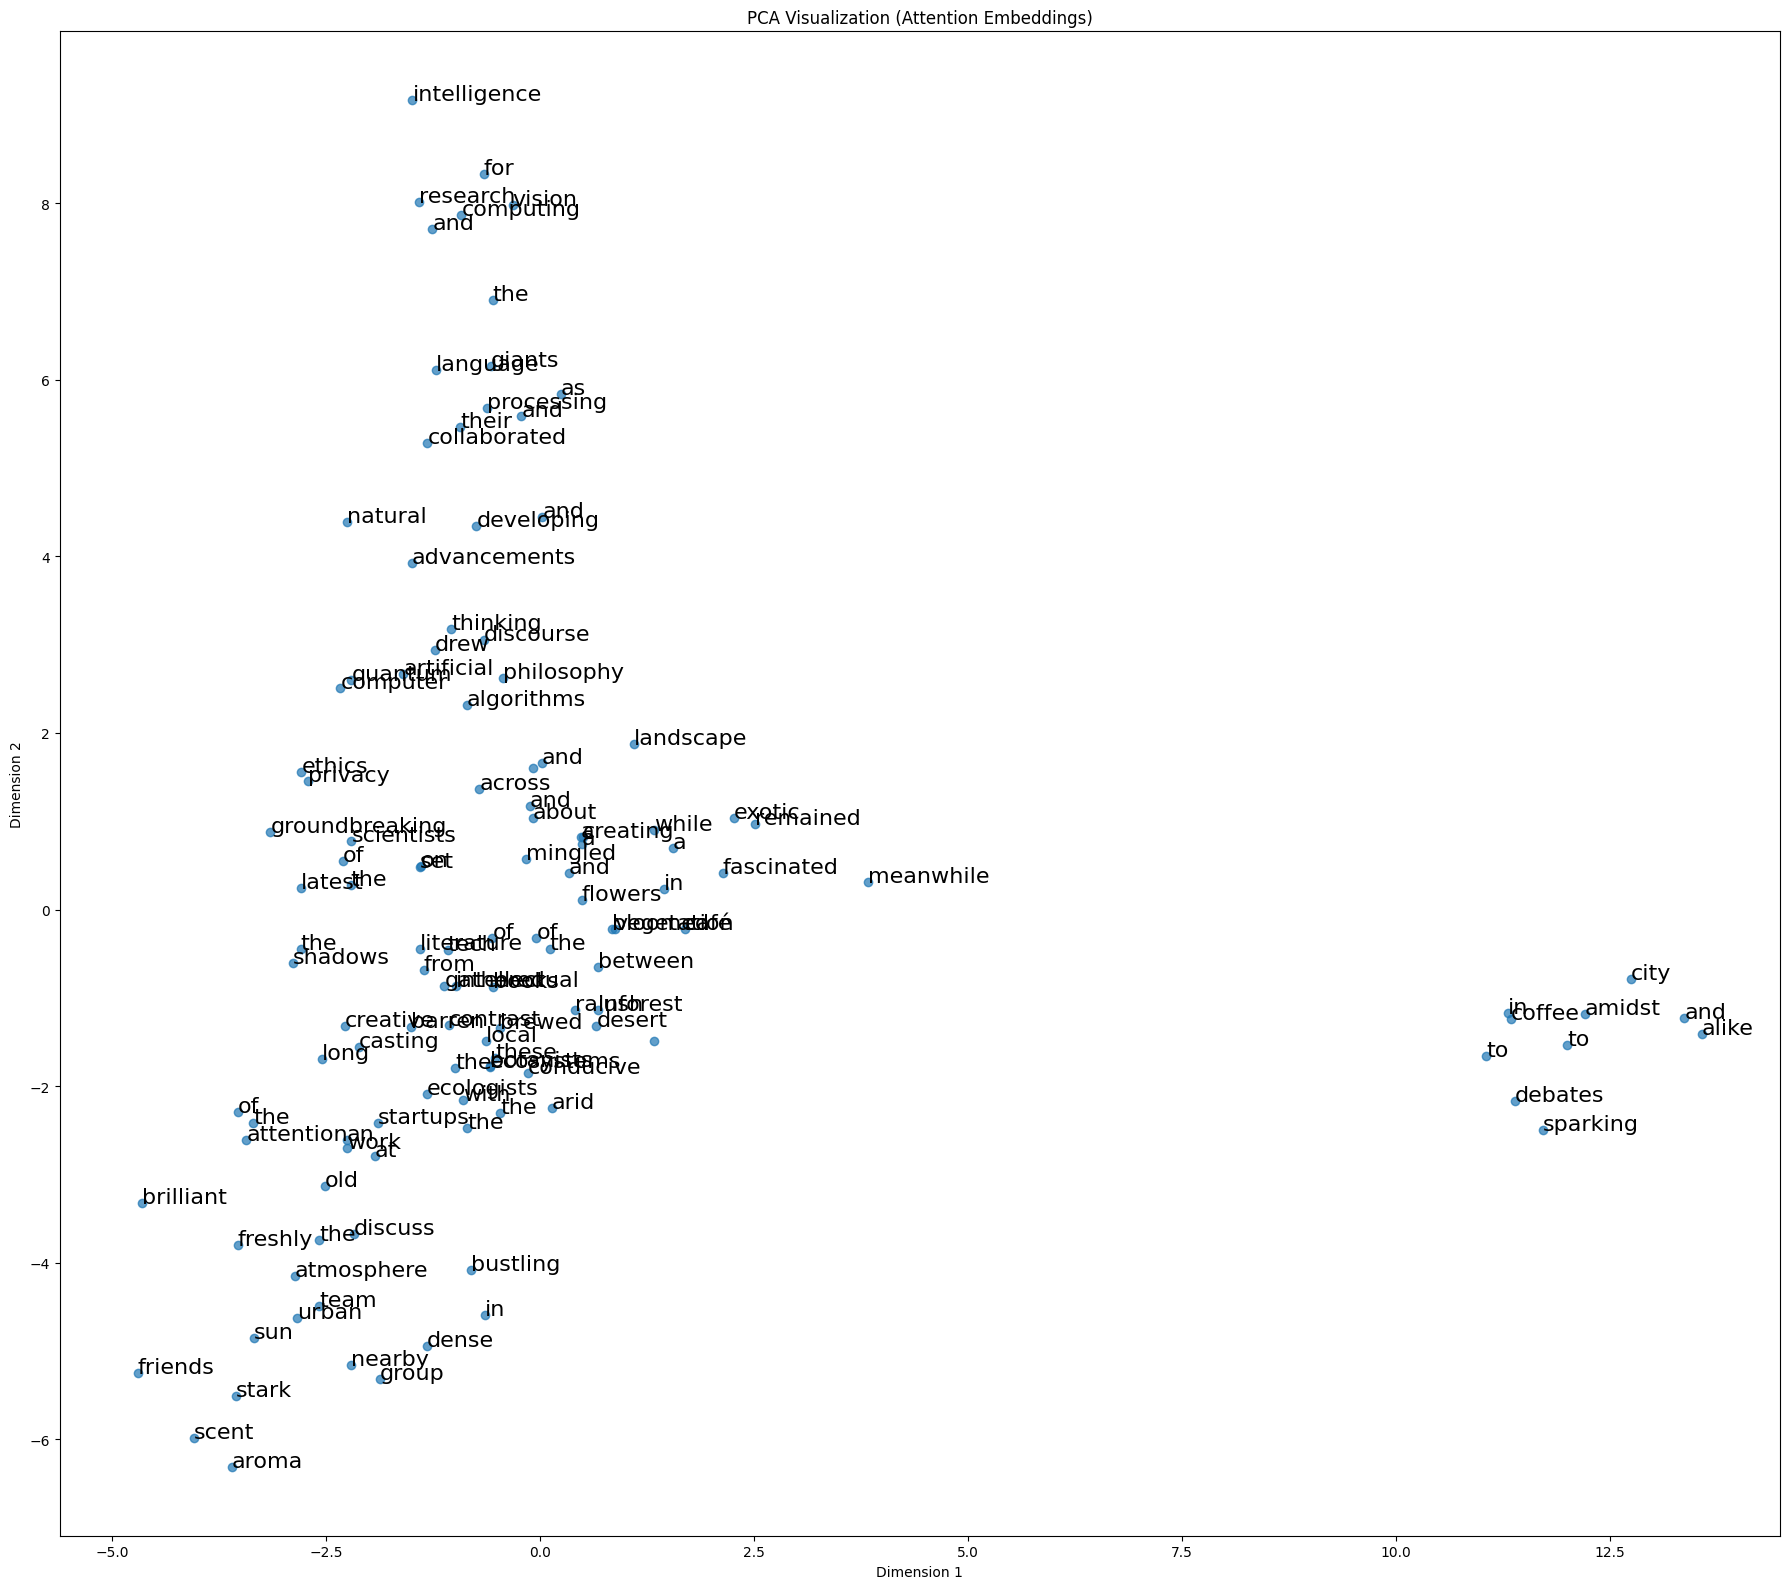

In [7]:
def main():

    text = "In the dense rainforest, exotic flowers bloomed amidst lush vegetation, while the nearby desert remained arid and barren. The stark contrast between these ecosystems fascinated ecologists and botanists alike. Meanwhile, in the bustling city, a team of brilliant scientists collaborated on groundbreaking artificial intelligence research, developing algorithms for natural language processing and computer vision. Their work drew attention from tech giants and startups, sparking debates about ethics and privacy. As the sun set, casting long shadows across the urban landscape, a group of friends gathered at a local café to discuss literature, philosophy, and the latest advancements in quantum computing. The aroma of freshly brewed coffee mingled with the scent of old books, creating an atmosphere conducive to intellectual discourse and creative thinking."
    words = re.findall(r'\w+', text.lower())

    # Random Embeddings
    random_vectors, words_list = get_random_embeddings(words)
    visualize_embeddings(random_vectors, words_list, 'Random Vectors', method='tsne')
    visualize_embeddings(random_vectors, words_list, 'Random Vectors', method='pca')

    # Word2Vec Embeddings
    w2v_vectors, words_list = get_w2v_embeddings(words, w2v)
    visualize_embeddings(w2v_vectors, words_list, 'Word2Vec Embeddings', method='tsne')
    visualize_embeddings(w2v_vectors, words_list, 'Word2Vec Embeddings', method='pca')

    # Attention Embeddings
    attention_embeddings = get_attention_embeddings(words)
    visualize_embeddings(attention_embeddings, words, 'Attention Embeddings', method='tsne')
    visualize_embeddings(attention_embeddings, words, 'Attention Embeddings', method='pca')

if __name__ == "__main__":
    main()

# ------------------------------------------------------------------------

# ------------------------------------------------------------------------

# ------------------------------------------------------------------------

In [8]:
# import torch
# from transformers import RobertaTokenizer, RobertaForSequenceClassification
# from transformers import pipeline

# model_name = "roberta-large"
# tokenizer = RobertaTokenizer.from_pretrained(model_name)
# model = RobertaForSequenceClassification.from_pretrained(model_name)

# sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# # Example usage
# text = "I love this product! It's amazing."
# result = sentiment_pipeline(text)
# print(result)

# ##################################################

# from transformers import pipeline

# sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# text = "I love this product! It's amazing."
# result = sentiment_pipeline(text)
# print(result)

In [9]:
# # Sample text
# # text = "apple orange iphone tv brick"
# # text = "The bank by the river was a popular spot for fishing, but the bank downtown was where people kept their money safe. As the leaves fell from the trees, signaling the fall season, many people began to fall into a melancholy mood. The brilliant scientist was known for her groundbreaking research on artificial intelligence, while her twin sister excelled in artificial flower arrangements. Despite the arid climate, the desert oasis thrived, its lush vegetation a stark contrast to the surrounding barren landscape."
# text = "In the dense rainforest, exotic flowers bloomed amidst lush vegetation, while the nearby desert remained arid and barren. The stark contrast between these ecosystems fascinated ecologists and botanists alike. Meanwhile, in the bustling city, a team of brilliant scientists collaborated on groundbreaking artificial intelligence research, developing algorithms for natural language processing and computer vision. Their work drew attention from tech giants and startups, sparking debates about ethics and privacy. As the sun set, casting long shadows across the urban landscape, a group of friends gathered at a local café to discuss literature, philosophy, and the latest advancements in quantum computing. The aroma of freshly brewed coffee mingled with the scent of old books, creating an atmosphere conducive to intellectual discourse and creative thinking."
# print(text)

In [10]:
# # Convert to lowercase and split into words
# words = re.findall(r'\w+', text.lower())
# print(words)

# Random Embedding

In [11]:
# # create a dictionary of tokens with random vectors
# random_vectors = defaultdict(lambda: np.random.rand(vector_dim))

# for token in words:
#     random_vectors[token]  # creates random vector if token doesn't exist

# print(len(random_vectors[0]))

In [12]:
# # Convert the dictionary to a list of vectors and words
# vectors = np.array(list(random_vectors.values()))
# words_list = list(random_vectors.keys())

# # Set the perplexity value based on the number of samples
# perplexity = min(len(words_list) - 1, 30)

# # Perform t-SNE dimensionality reduction
# tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
# tsne_vectors = tsne.fit_transform(vectors)

# # Perform PCA dimensionality reduction
# pca = PCA(n_components=2)
# pca_vectors = pca.fit_transform(vectors)

# Random Embedding Visualization

In [13]:
# # Plot the t-SNE results
# plt.figure(figsize=(18, 16))
# plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], alpha=0.7)
# for i, word in enumerate(words_list):
#     plt.annotate(word, xy=(tsne_vectors[i, 0], tsne_vectors[i, 1]), fontsize=16)
# plt.title('t-SNE Visualization (Random Vectors)')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.tight_layout()
# plt.show()

In [14]:
# # Plot the PCA results
# plt.figure(figsize=(18, 16))
# plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1], alpha=0.7)
# for i, word in enumerate(words_list):
#     plt.annotate(word, xy=(pca_vectors[i, 0], pca_vectors[i, 1]), fontsize=16)
# plt.title('PCA Visualization (Random Vectors)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.tight_layout()
# plt.show()

# W2v Embedding

In [15]:
# #  reate a dictionary of tokens with Word2Vec vectors
# w2v_vectors = defaultdict(lambda: np.zeros(vector_dim))  # Default to zero vector for unknown words

# for token in words:
#     if token in w2v.key_to_index:
#         w2v_vectors[token] = w2v[token]
#     else:
#         # If the token is not in the Word2Vec vocabulary, keep a zero vector
#         pass

# print(len(w2v_vectors[words[0]]))  # Print the length of the vector for the first word

In [16]:
# # Convert the dictionary to a list of vectors and words
# vectors = np.array(list(w2v_vectors.values()))
# words_list = list(w2v_vectors.keys())

# # Set the perplexity value based on the number of samples
# perplexity = min(len(words_list) - 1, 30)

# # Perform t-SNE dimensionality reduction
# tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
# tsne_vectors = tsne.fit_transform(vectors)

# # Perform PCA dimensionality reduction
# pca = PCA(n_components=2)
# pca_vectors = pca.fit_transform(vectors)

# W2V Embedding Visualization

In [17]:
# # Plot the t-SNE results
# plt.figure(figsize=(18, 16))
# plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], alpha=0.7)
# for i, word in enumerate(words_list):
#     plt.annotate(word, xy=(tsne_vectors[i, 0], tsne_vectors[i, 1]), fontsize=16)
# plt.title('t-SNE Visualization (Word2Vec Embeddings)')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.tight_layout()
# plt.show()

In [18]:
# # Plot the PCA results
# plt.figure(figsize=(18, 16))
# plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1], alpha=0.7)
# for i, word in enumerate(words_list):
#     plt.annotate(word, xy=(pca_vectors[i, 0], pca_vectors[i, 1]), fontsize=16)
# plt.title('PCA Visualization (Word2Vec Embeddings)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.tight_layout()
# plt.show()

# Attention Embedding

In [19]:
# # Load pre-trained BERT model and tokenizer
# model = BertModel.from_pretrained('bert-base-uncased')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Tokenize the input words
# input_ids = tokenizer.encode(words, add_special_tokens=True, return_tensors='pt')

# # Pass the input through BERT model
# with torch.no_grad():
#     outputs = model(input_ids)
#     attention_embeddings = outputs.last_hidden_state

In [20]:
# # Convert attention embeddings to numpy array
# attention_embeddings = attention_embeddings.squeeze(0).numpy()

# # Set the perplexity value based on the number of samples
# perplexity = min(len(words) - 1, 30)

# # Perform t-SNE dimensionality reduction
# tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
# tsne_vectors = tsne.fit_transform(attention_embeddings)

# # Perform PCA dimensionality reduction
# pca = PCA(n_components=2)
# pca_vectors = pca.fit_transform(attention_embeddings)

# Attention Embedding Visualization

In [21]:
# # Plot the t-SNE results
# plt.figure(figsize=(18, 16))
# plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], alpha=0.7)
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(tsne_vectors[i, 0], tsne_vectors[i, 1]), fontsize=16)
# plt.title('t-SNE Visualization (Attention Embeddings)')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.tight_layout()
# plt.show()

In [22]:
# # Plot the PCA results
# plt.figure(figsize=(18, 16))
# plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1], alpha=0.7)
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(pca_vectors[i, 0], pca_vectors[i, 1]), fontsize=16)
# plt.title('PCA Visualization (Attention Embeddings)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.tight_layout()
# plt.show()

# W2V + Attention Embedding

In [23]:
# # Load pre-trained Word2Vec embeddings
# w2v_embeddings = torch.tensor(vectors)  # Load your Word2Vec embeddings into a PyTorch tensor

# # Load pre-trained BERT model and tokenizer
# model = BertModel.from_pretrained('bert-base-uncased')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Tokenize the input words
# input_ids = tokenizer.encode(words, add_special_tokens=True, return_tensors='pt')

# # Pass the input through BERT model
# with torch.no_grad():
#     outputs = model(input_ids)
#     attention_embeddings = outputs.last_hidden_state

# # Apply additional attention (optional)
# # attention_enriched_embeddings = torch.nn.functional.scaled_dot_product_attention(
# #     attention_embeddings, attention_embeddings, attention_embeddings
# # )[0]

# W2V + Attention Embedding Visualization

In [24]:
# # Convert attention-enriched embeddings to numpy array
# attention_enriched_embeddings = attention_embeddings.squeeze(0).numpy()

# # Set the perplexity value based on the number of samples
# perplexity = min(len(words) - 1, 30)

# # Perform t-SNE dimensionality reduction
# tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
# tsne_vectors = tsne.fit_transform(attention_enriched_embeddings)

# # Perform PCA dimensionality reduction
# pca = PCA(n_components=2)
# pca_vectors = pca.fit_transform(attention_enriched_embeddings)

In [25]:
# # Plot the t-SNE results
# plt.figure(figsize=(18, 16))
# plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], alpha=0.7)
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(tsne_vectors[i, 0], tsne_vectors[i, 1]), fontsize=16)
# plt.title('t-SNE Visualization (Attention-Enriched Word2Vec Embeddings)')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.tight_layout()
# plt.show()

In [26]:
# # Plot the PCA results
# plt.figure(figsize=(18, 16))
# plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1], alpha=0.7)
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(pca_vectors[i, 0], pca_vectors[i, 1]), fontsize=16)
# plt.title('PCA Visualization (Attention-Enriched Word2Vec Embeddings)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.tight_layout()
# plt.show()